<a href="https://colab.research.google.com/github/vidhu-psit/MachineLearning/blob/master/Linear_Regression/Class4/Digital_Additional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

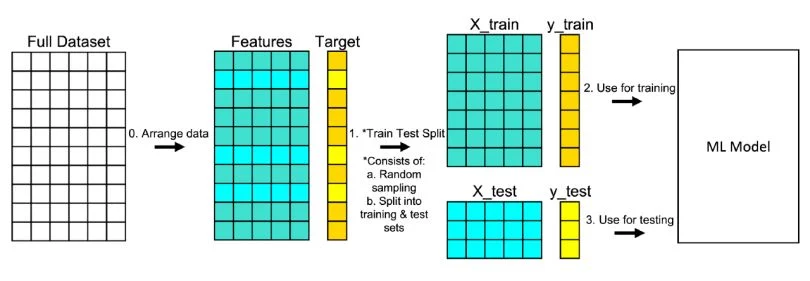

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data        # Features (all measurements)
y = iris.target      # Labels (species)




In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes using sklearn:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes using sklearn:
X_train: (120, 4)
X_test: (30, 4)
y_train: (120,)
y_test: (30,)




## 🌟 **Feature Importance & Interpretation in Linear Regression**

Linear regression gives us a **formula** like:

[
y = b_0 + b_1x_1 + b_2x_2 + \dots
]

Here:

* ( b_0 ) = intercept
* ( b_1, b_2, ... ) = **coefficients (feature importance)**

---

## 🧠 What does a coefficient mean?

A coefficient tells **how much the prediction changes** when the feature increases by **1 unit**, while keeping all other features constant.

👉 In simple words:

> **Coefficient = How strongly and in what direction a feature affects the output.**

* **Positive coefficient → feature increases output**
* **Negative coefficient → feature decreases output**
* **Bigger value → bigger impact (more important)**

---

## 📌 Simple Example Dataset

Suppose we're predicting **house price** based only on **area**:

| Area (sq ft) | Price (₹ Lakhs) |
| ------------ | --------------- |
| 1000         | 50              |
| 1200         | 60              |
| 1500         | 75              |
| 1800         | 90              |

After fitting a linear regression model, we get:

[
\text{Price} = 5 + 0.05 \times \text{Area}
]

---

## 🔍 Interpretation

* **Intercept (`5`)**:
  If the area were **0**, the model predicts the price would be **₹5 lakhs**.
  (It doesn't make real-world sense, but mathematically it anchors the line.)

* **Coefficient of Area (`0.05`)**:

  → This means:

  **For every 1 sq ft increase in area, price increases by ₹0.05 lakhs (₹5,000).**

So:

* If the house becomes **100 sq ft bigger**, the predicted price increases by:

  [
  100 \times 0.05 = 5 \text{ lakhs}
  ]

---

## 💡 Now with Two Features

Suppose now we add **number of bedrooms**.

| Area | Bedrooms | Price (₹ Lakhs) |
| ---- | -------- | --------------- |
| 1000 | 2        | 55              |
| 1200 | 2        | 62              |
| 1500 | 3        | 80              |

Model learns:

[
\text{Price} = 3 + 0.04 \times \text{Area} + 8 \times \text{Bedrooms}
]

### Interpretation:

* **Coefficient of Area (0.04):**
  When area increases by **1 sq ft**, price increases by **₹0.04 lakhs (₹4,000)** — assuming **bedrooms stay the same.**

* **Coefficient of Bedrooms (8):**
  Adding **one extra bedroom increases the house price by ₹8 lakhs**, assuming **area doesn’t change.**

---

## 🧠 Key Concept

| Feature    | Coefficient | Meaning                         |
| ---------- | ----------- | ------------------------------- |
| Area       | 0.04        | Bigger area → higher price      |
| Bedrooms   | 8           | More bedrooms → higher price    |
| Sign ( + ) | positive    | Both features push price upward |

---


> In Linear Regression, coefficients tell us how important each feature is.
> They show **how much the output changes** when that feature changes by **one unit**, keeping everything else constant.

* **Higher magnitude → more influence**
* **Positive → increases prediction**
* **Negative → decreases prediction**




In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# -------------------------
# 1️⃣ Create a cleaner dummy dataset
# -------------------------
np.random.seed(42)

data = pd.DataFrame({
    'Experience_years': np.random.randint(1, 11, 10),
    'Salary_in_$': np.random.randint(50000, 200000, 10),  # large scale difference
})

# Create target that increases with both features
data['Performance_Score'] = (
    2 * data['Experience_years'] +
    0.0001 * data['Salary_in_$'] + np.random.randn(10)
)

print("📌 Dataset:")
print(data)

X = data[['Experience_years', 'Salary_in_$']]
y = data['Performance_Score']


📌 Dataset:
   Experience_years  Salary_in_$  Performance_Score
0                 7        66023          17.989751
1                 4        91090          18.059370
2                 8       117221          28.538545
3                 5       114820          19.958124
4                 7        50769          18.648854
5                10       109735          30.231093
6                 3       114925          16.789156
7                 7        55311          17.391479
8                 8       153355          30.706025
9                 5       135305          24.128220


In [ ]:
model_raw = LinearRegression()
model_raw.fit(X, y)

print("\n🔍 Coefficients WITHOUT Scaling:")
for feature, coef in zip(X.columns, model_raw.coef_):
    print(f"{feature}: {coef}")


🔍 Coefficients WITHOUT Scaling:
Experience_years: 1.9098257542956072
Salary_in_$: 0.00011524389731930692


In [ ]:
# ----------------------------
# 3️⃣ Train with StandardScaler
# ----------------------------
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

model_std = LinearRegression()
model_std.fit(X_std, y)

print("\n⚙️ Coefficients WITH StandardScaler:")
for feature, coef in zip(X.columns, model_std.coef_):
    print(f"{feature}: {coef}")


⚙️ Coefficients WITH StandardScaler:
Experience_years: 3.8387022577368475
Salary_in_$: 3.747505043645622


In [ ]:
scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)

model_mm = LinearRegression()
model_mm.fit(X_mm, y)
print("\n📏 Coefficients WITH MinMaxScaler:")
for feature, coef in zip(X.columns, model_mm.coef_):
    print(f"{feature}: {coef}")


📏 Coefficients WITH MinMaxScaler:
Experience_years: 13.368780280069256
Salary_in_$: 11.82241045039842


Great question — this is something even professionals get confused about.

Let’s make it **very clear and memorable.**

---

## 🎯 Rule of Thumb

| If model is **distance-based / gradient-based** | Prefer **StandardScaler** |
| ----------------------------------------------- | ------------------------- |
| If model expects **bounded values (0-1)**       | Prefer **MinMaxScaler**   |

---

## 🧠 When to Use **StandardScaler**

👉 Use when the model **assumes data is normally distributed** or uses **distance math**, such as:

✔ Linear Regression
✔ Logistic Regression
✔ SVM
✔ PCA
✔ KNN
✔ K-Means
✔ Neural Networks

💡 StandardScaler makes the data **mean = 0, std = 1**, which helps gradients and distance calculations behave naturally.

📌 Best choice for **most ML models**.

---

## 🧠 When to Use **MinMaxScaler**

👉 Use when you need **values strictly between 0 and 1**, such as:

✔ Deep Learning (especially activation functions like sigmoid/tanh)
✔ Image pixel data (0–255 → 0–1 is common)
✔ Models sensitive to absolute magnitude (like Gradient Boosting sometimes)

📌 Also useful when features already have a **bounded natural range**.

---

## 🚨 Warning: Outliers Matter

| Scaler           | Sensitive to Outliers?                         |
| ---------------- | ---------------------------------------------- |
| StandardScaler   | 😬 Yes (mean & std inflated)                   |
| MinMaxScaler     | 😱 Very sensitive (max/min shift dramatically) |



In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Original data with an outlier
data = np.array([[10], [12], [14], [16], [500]])  # 500 is the outlier

print("📌 Original Data:")
print(data.reshape(-1))

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print("\n📏 After Min-Max Scaling:")
print(scaled_data.reshape(-1))


📌 Original Data:
[ 10  12  14  16 500]

📏 After Min-Max Scaling:
[0.         0.00408163 0.00816327 0.0122449  1.        ]


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Same data with an outlier
data = np.array([[10], [12], [14], [16], [500]])

print("📌 Original Data:")
print(data.reshape(-1))

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("\n⚙️ After Standard Scaling:")
print(scaled_data.reshape(-1))


📌 Original Data:
[ 10  12  14  16 500]

⚙️ After Standard Scaling:
[-0.51537325 -0.50510685 -0.49484045 -0.48457405  1.9998946 ]


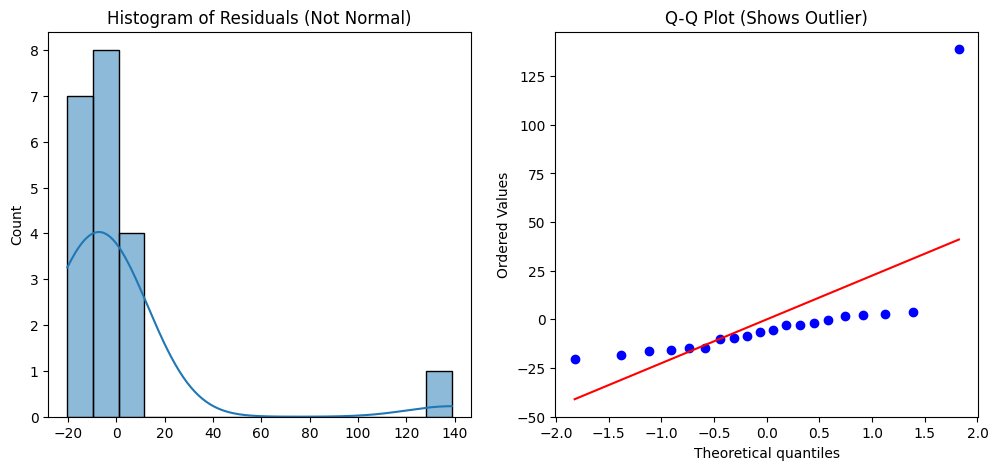

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import probplot

# -------------------------
# 1️⃣ Create linear data
# -------------------------
np.random.seed(42)

X = np.arange(1, 21)  # 20 points
y = 3 * X + np.random.normal(0, 2, size=20)  # Perfect linear trend + small noise

# -------------------------
# 2️⃣ Add an OUTLIER
# -------------------------
y[15] = 200  # Replace point 16th value with extreme outlier

# -------------------------
# 3️⃣ Fit Linear Regression
# -------------------------
model = LinearRegression()
model.fit(X.reshape(-1,1), y)
y_pred = model.predict(X.reshape(-1,1))

# -------------------------
# 4️⃣ Compute Residuals
# -------------------------
residuals = y - y_pred

# -------------------------
# 5️⃣ Plot histogram & Q-Q
# -------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals (Not Normal)")

plt.subplot(1,2,2)
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot (Shows Outlier)")

plt.show()


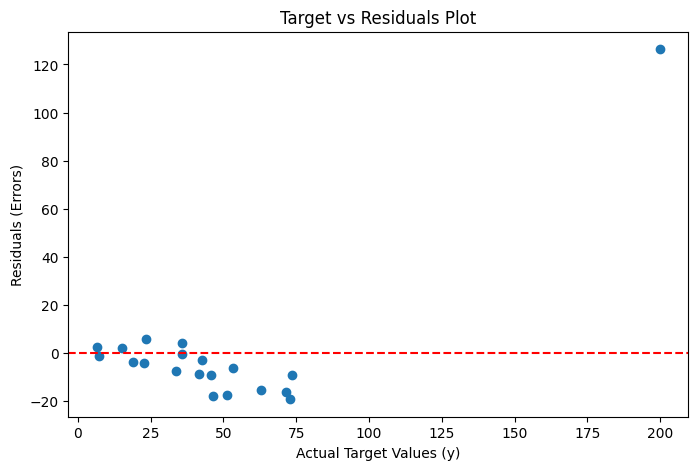

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Create linear data
X = np.arange(1, 21).reshape(-1,1)
y = 4 * X.flatten() + np.random.normal(0, 5, size=20)

# Add some nonlinearity/outlier to break assumptions
y[15] = 200

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Scatter Plot (Target vs Residuals)
plt.figure(figsize=(8,5))
plt.scatter(y, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Target vs Residuals Plot")
plt.xlabel("Actual Target Values (y)")
plt.ylabel("Residuals (Errors)")
plt.show()


When we plot a **scatter plot between the target variable (y)** and the **residuals (errors)**, we are checking whether the **pattern of errors is random or structured**.

Let’s make this very clear with:

* A simple code example
* What a **good plot** looks like
* What a **bad plot** looks like
* How to interpret it

---

### ✅ **Python Code: Scatter Plot Between Target Values and Residuals**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Create linear data
X = np.arange(1, 21).reshape(-1,1)
y = 4 * X.flatten() + np.random.normal(0, 5, size=20)

# Add some nonlinearity/outlier to break assumptions
y[15] = 200

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Scatter Plot (Target vs Residuals)
plt.figure(figsize=(8,5))
plt.scatter(y, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Target vs Residuals Plot")
plt.xlabel("Actual Target Values (y)")
plt.ylabel("Residuals (Errors)")
plt.show()
```

---

### 📌 How to Interpret This Plot?

You're looking for **patterns**.

---

#### ✅ **If the model is working well (assumptions okay):**

The scatter will look like:

```
   .  .  . .
 .   .   . .
. . . . . .
-------- zero line -------
```

✔️ No shape
✔️ Errors randomly spread around zero
✔️ No trend, curve, or funnel shape

👉 Means the model captured the relationship correctly.

---

#### ❌ **If the plot shows a pattern:**

Examples:

| Pattern                                      | Meaning                          | Problem                        |
| -------------------------------------------- | -------------------------------- | ------------------------------ |
| 📈 Curved (U-shape or ∩ shape)               | Relationship is nonlinear        | Linear model inappropriate     |
| 🔺 Funnel shape (Triangle form)              | Variance increases with y        | Heteroscedasticity             |
| 🎯 One extreme point far away                | Outlier                          | Affects model fit              |
| ➡️ Clear slope (residuals increasing with y) | Model underpredicts large values | Missing feature or wrong model |

---

### 🧠 Why do we do this check?

Because in **Linear Regression**, one assumption is:

> **Errors should be independent and have constant variance.**

If residuals change as the target changes (pattern), the model is **biased** and assumptions are broken.

---

### 🔥 Summary in One Sentence:

> When you plot **Target vs Residuals**, you expect a **random cloud of points** — any visible structure indicates the linear model has missed something (nonlinearity, outliers, heteroscedasticity, or missing variables).

---




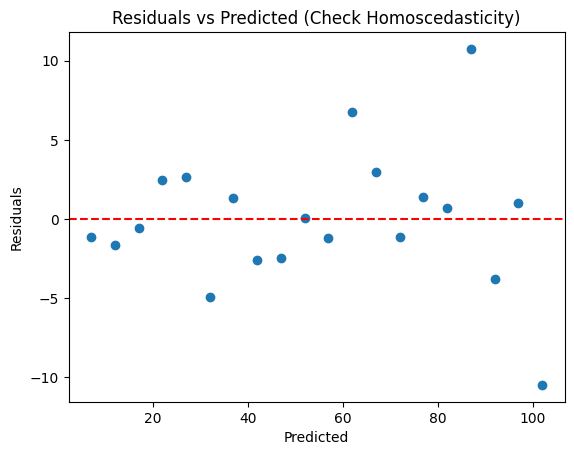

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Simulate some data
np.random.seed(0)
X = np.arange(1, 21).reshape(-1,1)
y = 5*X.flatten() + np.random.normal(0, X.flatten()*0.5, size=20)  # Increasing variance

# Fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# Residual plot
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Check Homoscedasticity)")
plt.show()


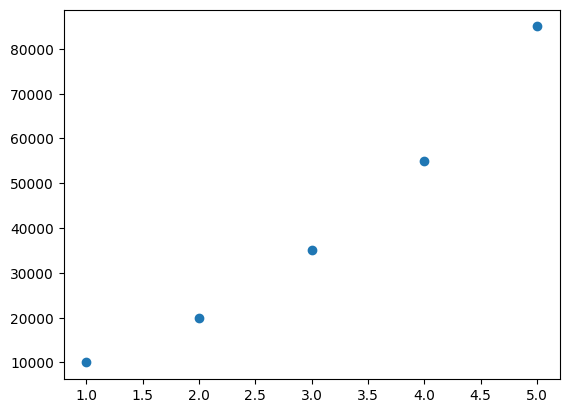

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([10000,20000,35000,55000,85000])

# Build models
degrees = [1,2,3]
predictions = {}

plt.scatter(X, y)  # Actual data

In [ ]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [ ]:
poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)

In [ ]:
X_poly

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

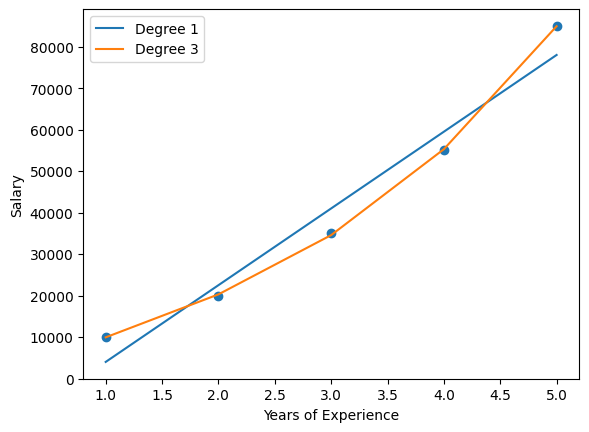


Degree 1 Predictions:
[ 4000. 22500. 41000. 59500. 78000.]

Degree 3 Predictions:
[ 9928.57142857 20285.71428571 34571.42857143 55285.71428571
 84928.57142857]


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([10000,20000,35000,55000,85000])

# Build models
degrees = [1,3,]
predictions = {}

plt.scatter(X, y)  # Actual data

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict on same values
    y_pred = model.predict(X_poly)
    predictions[d] = y_pred

    # Plot line
    plt.plot(X, y_pred, label=f"Degree {d}")

plt.legend()
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

for d in degrees:
    print(f"\nDegree {d} Predictions:")
    print(predictions[d])


In [ ]:
model.coef_

array([   0.        , 9047.61904762, -535.71428571,  416.66666667])